In [ ]:
# TASK-2 - MOVIE RATING PREDICTION USING PYTHON

# Author: Gopal Krishna

# Batch: June A58

# Domain: Data Science

# Aim: Build a model that predicts the rating of a movie based on features like genre, director, and actors.

*Importing important Libraries*


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*Importing DATASET*

In [ ]:
data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')
data.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
data.shape

(15509, 10)

In [ ]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  15509
Number of columns:  10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
print("Any missing value?",data.isnull().values.any())

Any missing value? True


**From above cell it is clear there are few null values in age column**

In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

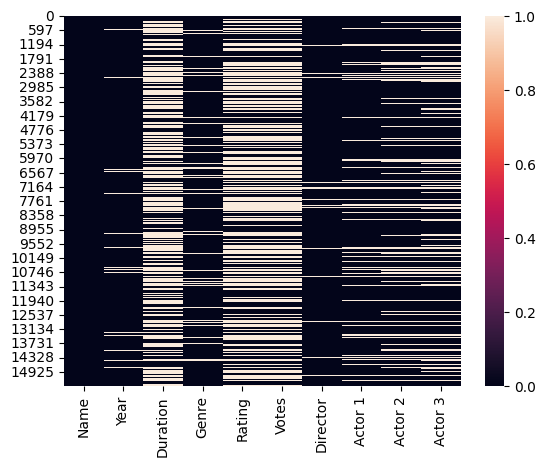

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
per_missing = data.isnull().sum() * 100 / len(data)
per_missing

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

*Drop The Missing Values*

In [ ]:
data.dropna(axis=0)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


*Check for Duplicate Values*

In [ ]:
data_dup=data.duplicated().any()

In [ ]:
print("Are there any duplicate values?",data_dup)

Are there any duplicate values? True


In [ ]:
data.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


*Get Overall Statistics*

In [ ]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [ ]:
(data.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

***Top 15 Genre Based on Rating and Year***

In [ ]:
top15_len=data.nlargest(15,'Rating')[['Year','Rating','Genre']]\
.set_index('Year')

In [ ]:
top15_len

,Rating,Genre
Year,,
(2020),10.0,"Drama, Romance"
(2021),9.7,"Music, Romance"
(2020),9.6,Drama
(2019),9.4,"History, Romance"
(2021),9.4,Drama
(2017),9.4,Documentary
(2020),9.4,Drama
(2018),9.3,Drama
(2021),9.3,Family


<Axes: xlabel='Rating', ylabel='Year'>

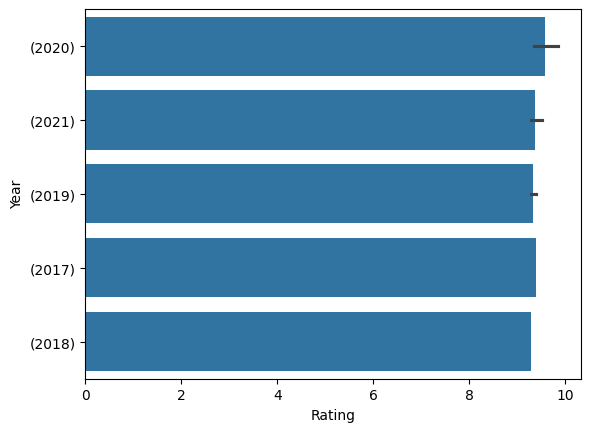

In [ ]:
sns.barplot(x='Rating',y=top15_len.index,data=top15_len)

In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

***Top 10 Director Based on Rating***

In [ ]:
top10_len=data.nlargest(10,'Rating')[['Name','Rating','Director']]\
.set_index('Name')

In [ ]:
top10_len

,Rating,Director
Name,,
Love Qubool Hai,10.0,Saif Ali Sayeed
Half Songs,9.7,Sriram Raja
Breed,9.6,Bobby Kumar
Gho Gho Rani,9.4,Munni Pankaj
June,9.4,Suhrud Godbole
Ram-Path,9.4,Ashish Dubey
The Reluctant Crime,9.4,Arvind Pratap
Ashok Vatika,9.3,Rahul Mallick
Baikunth,9.3,Vishwa Bhanu


<Axes: xlabel='Rating', ylabel='Name'>

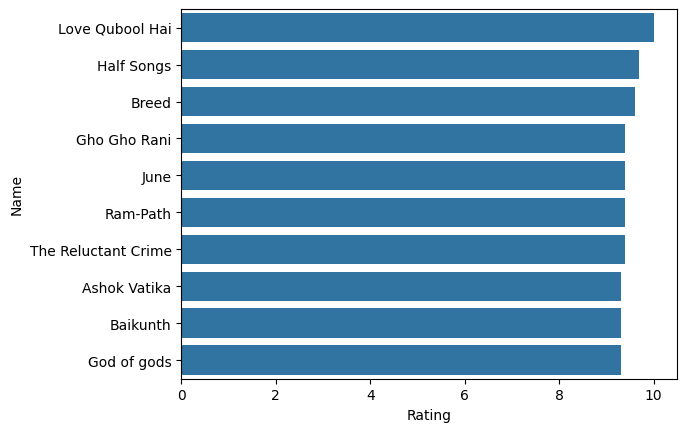

In [ ]:
sns.barplot(x='Rating',y=top10_len.index,data=top10_len)

In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

***Top Actors Based on Rating***

In [ ]:
top10_len=data.nlargest(10,'Rating')[['Actor 1','Rating']]\
.set_index('Actor 1')

In [ ]:
top10_len

,Rating
Actor 1,
Ahaan Jha,10.0
Raj Banerjee,9.7
Bobby Kumar,9.6
Nishi Neha Mishra,9.4
Vaibhav Khisti,9.4
Ishan Jacob,9.4
Dharmendra Ahir,9.4
Kunj Anand,9.3
Vishwa Bhanu,9.3


<Axes: xlabel='Rating', ylabel='Actor 1'>

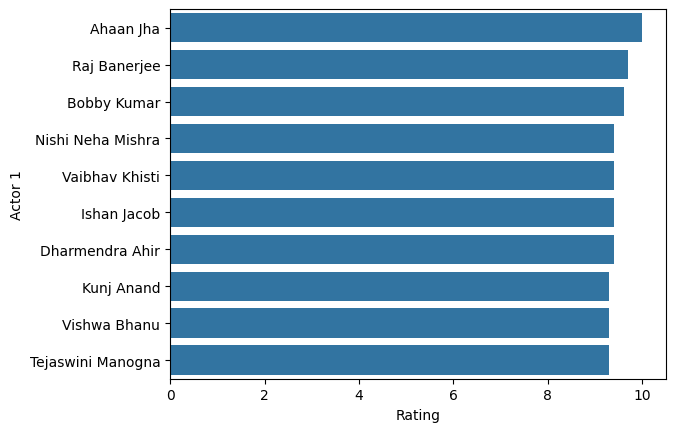

In [ ]:
sns.barplot(x='Rating',y=top10_len.index,data=top10_len)

In [ ]:
top8_len=data.nlargest(8,'Rating')[['Actor 2','Rating']]\
.set_index('Actor 2')

In [ ]:
top8_len

,Rating
Actor 2,
Mahesh Narayan,10.0
Emon Chatterjee,9.7
Ashfaq,9.6
Pankaj Kamal,9.4
Nilesh Divekar,9.4
NaN,9.4
Awanish Kotnal,9.4
Sanjay Bishnoi,9.3


<Axes: xlabel='Rating', ylabel='Actor 2'>

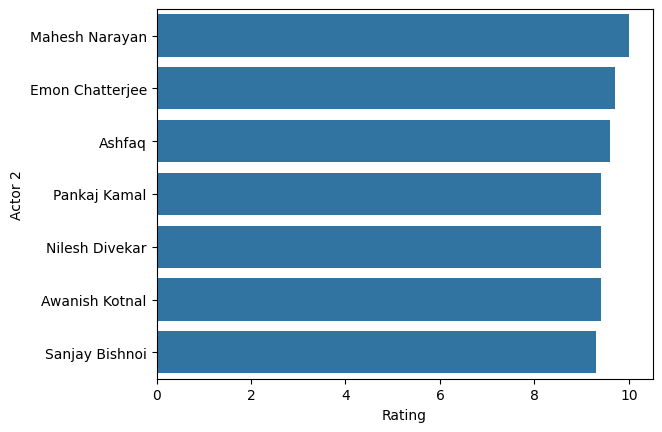

In [ ]:
sns.barplot(x='Rating',y=top8_len.index,data=top8_len)

In [ ]:
top5_len=data.nlargest(5,'Rating')[['Actor 3','Rating']]\
.set_index('Actor 3')

In [ ]:
top5_len

,Rating
Actor 3,
Rajasree Rajakumari,10.0
Purshottam Mulani,9.7
Fasih Choudhry,9.6
Akash Kumar,9.4
Jitendra Joshi,9.4


<Axes: xlabel='Rating', ylabel='Actor 3'>

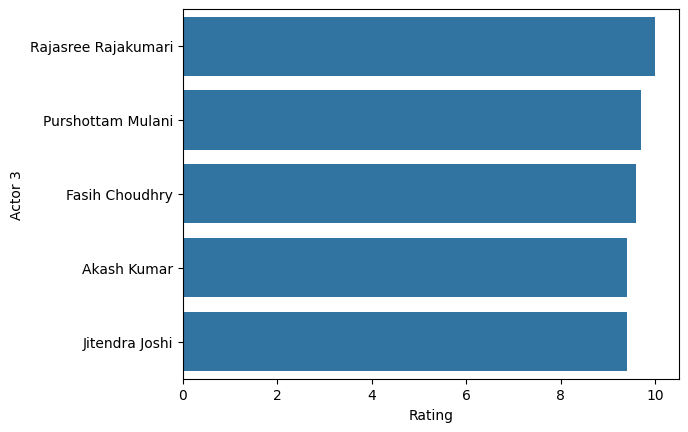

In [ ]:
sns.barplot(x='Rating',y=top5_len.index,data=top5_len)

***Classify Movies Based on Ratings [Excellent, Good and Average***

In [ ]:
def rating(rating):
    if rating >= 7.0:
        return "Excellent"
    elif rating >= 6.0:
        return "Good"
    else:
        return "Average"

In [ ]:
data['rating_cat'] = data['Rating'].apply(rating)

In [ ]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,rating_cat
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Average
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Excellent
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Average
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Average
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Average
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Average
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Excellent
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN,Average
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Average
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,Average


***Find Unique Values from Genre***

In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'rating_cat'],
      dtype='object')

In [ ]:
data['Genre']

0                  Drama
1                  Drama
2         Drama, Musical
3        Comedy, Romance
4                  Drama
              ...       
15504             Action
15505      Action, Drama
15506             Action
15507             Action
15508      Action, Drama
Name: Genre, Length: 15509, dtype: object

In [ ]:
list1=[]
for value in data['Genre']:
    if isinstance(value, str):  # Check if the value is a string
        list1.append(value.split(','))
    else:
        list1.append([])  # Append an empty list for non-string values (like NaN)

In [ ]:
list1

[['Drama'],
 ['Drama'],
 ['Drama', ' Musical'],
 ['Comedy', ' Romance'],
 ['Drama'],
 ['Comedy', ' Drama', ' Musical'],
 ['Drama', ' Romance', ' War'],
 ['Documentary'],
 ['Horror', ' Mystery', ' Thriller'],
 ['Action', ' Crime', ' Thriller'],
 ['Drama'],
 ['Horror'],
 ['Horror', ' Romance', ' Thriller'],
 ['Comedy', ' Drama', ' Romance'],
 ['Thriller'],
 ['Comedy', ' Drama'],
 [],
 ['Comedy', ' Drama', ' Fantasy'],
 ['Comedy', ' Drama', ' Romance'],
 [],
 ['Comedy', ' Drama', ' Family'],
 ['Crime', ' Drama', ' Mystery'],
 ['Horror', ' Thriller'],
 ['Biography'],
 ['Documentary'],
 ['Comedy', ' Horror'],
 ['Action'],
 ['Drama'],
 ['Drama', ' Horror', ' Mystery'],
 ['Comedy'],
 ['Drama'],
 [],
 ['Drama'],
 ['Action', ' Thriller'],
 ['Action'],
 ['Drama', ' History'],
 ['Drama'],
 ['Drama', ' History', ' Sport'],
 ['Horror', ' Mystery', ' Romance'],
 ['Horror', ' Mystery'],
 ['Drama', ' Horror', ' Romance'],
 ['Horror', ' Mystery', ' Romance'],
 ['Action', ' Drama', ' History'],
 ['Actio

In [ ]:
one_d=[]
for sublist in list1:
    for item in sublist:
        one_d.append(item)

In [ ]:
one_d

['Drama',
 'Drama',
 'Drama',
 ' Musical',
 'Comedy',
 ' Romance',
 'Drama',
 'Comedy',
 ' Drama',
 ' Musical',
 'Drama',
 ' Romance',
 ' War',
 'Documentary',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 ' Thriller',
 'Drama',
 'Horror',
 'Horror',
 ' Romance',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Thriller',
 'Comedy',
 ' Drama',
 'Comedy',
 ' Drama',
 ' Fantasy',
 'Comedy',
 ' Drama',
 ' Romance',
 'Comedy',
 ' Drama',
 ' Family',
 'Crime',
 ' Drama',
 ' Mystery',
 'Horror',
 ' Thriller',
 'Biography',
 'Documentary',
 'Comedy',
 ' Horror',
 'Action',
 'Drama',
 'Drama',
 ' Horror',
 ' Mystery',
 'Comedy',
 'Drama',
 'Drama',
 'Action',
 ' Thriller',
 'Action',
 'Drama',
 ' History',
 'Drama',
 'Drama',
 ' History',
 ' Sport',
 'Horror',
 ' Mystery',
 ' Romance',
 'Horror',
 ' Mystery',
 'Drama',
 ' Horror',
 ' Romance',
 'Horror',
 ' Mystery',
 ' Romance',
 'Action',
 ' Drama',
 ' History',
 'Action',
 ' Drama',
 ' War',
 'Thriller',
 'Comedy',
 'Drama'

In [ ]:
uni_list=[]
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)


In [ ]:
uni_list

['Drama',
 ' Musical',
 'Comedy',
 ' Romance',
 ' Drama',
 ' War',
 'Documentary',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 'Thriller',
 ' Fantasy',
 ' Family',
 'Crime',
 'Biography',
 ' Horror',
 ' History',
 ' Sport',
 'Adventure',
 ' Sci-Fi',
 'War',
 'Sport',
 ' Comedy',
 ' Adventure',
 ' Biography',
 'Mystery',
 'Musical',
 ' Music',
 'Romance',
 'Family',
 'Fantasy',
 'Sci-Fi',
 'Animation',
 'Music',
 'History',
 ' Action',
 ' News',
 ' Western',
 ' Reality-TV',
 'Reality-TV',
 ' Short']

***How Many Films of Each Genre were Made?***

In [ ]:
one_d=[]
for sublist in list1:
    for item in sublist:
        one_d.append(item)

In [ ]:
one_d

['Drama',
 'Drama',
 'Drama',
 ' Musical',
 'Comedy',
 ' Romance',
 'Drama',
 'Comedy',
 ' Drama',
 ' Musical',
 'Drama',
 ' Romance',
 ' War',
 'Documentary',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 ' Thriller',
 'Drama',
 'Horror',
 'Horror',
 ' Romance',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Thriller',
 'Comedy',
 ' Drama',
 'Comedy',
 ' Drama',
 ' Fantasy',
 'Comedy',
 ' Drama',
 ' Romance',
 'Comedy',
 ' Drama',
 ' Family',
 'Crime',
 ' Drama',
 ' Mystery',
 'Horror',
 ' Thriller',
 'Biography',
 'Documentary',
 'Comedy',
 ' Horror',
 'Action',
 'Drama',
 'Drama',
 ' Horror',
 ' Mystery',
 'Comedy',
 'Drama',
 'Drama',
 'Action',
 ' Thriller',
 'Action',
 'Drama',
 ' History',
 'Drama',
 'Drama',
 ' History',
 ' Sport',
 'Horror',
 ' Mystery',
 ' Romance',
 'Horror',
 ' Mystery',
 'Drama',
 ' Horror',
 ' Romance',
 'Horror',
 ' Mystery',
 ' Romance',
 'Action',
 ' Drama',
 ' History',
 'Action',
 ' Drama',
 ' War',
 'Thriller',
 'Comedy',
 'Drama'

In [ ]:
from collections import Counter

In [ ]:
Counter(one_d)

Counter({'Drama': 4517,
         ' Musical': 424,
         'Comedy': 1561,
         ' Romance': 1687,
         ' Drama': 2726,
         ' War': 39,
         'Documentary': 383,
         'Horror': 403,
         ' Mystery': 365,
         ' Thriller': 927,
         'Action': 3487,
         ' Crime': 863,
         'Thriller': 786,
         ' Fantasy': 266,
         ' Family': 782,
         'Crime': 459,
         'Biography': 155,
         ' Horror': 121,
         ' History': 178,
         ' Sport': 59,
         'Adventure': 252,
         ' Sci-Fi': 48,
         'War': 8,
         'Sport': 11,
         ' Comedy': 468,
         ' Adventure': 289,
         ' Biography': 53,
         'Mystery': 148,
         'Musical': 165,
         ' Music': 74,
         'Romance': 762,
         'Family': 161,
         'Fantasy': 192,
         'Sci-Fi': 10,
         'Animation': 125,
         'Music': 16,
         'History': 29,
         ' Action': 56,
         ' News': 9,
         ' Western': 5,
         ' R